Importing Modules

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import plotly
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor

Setting Path and City Variables

In [21]:
data_dir = '/Users/trayansh/Downloads/AirVeda_Data/{}.csv'
city_dict = {'Ahembdabad':0,'Mumbai':1,'Amritsar':3}
df = pd.DataFrame()
null_columns = list()

Combining all Data into one Data Frame

In [22]:
for city in city_dict.keys():
    df_ = pd.read_csv(data_dir.format(city))
    df_['City'] = city_dict[city]
    null_columns.extend([x for x in df_.columns[df_.isnull().all()].values])
    df = pd.concat([df,df_],ignore_index = True)
del df_

Removing NULL Columns and Data Frame Description ==> NO Negative Values Found

In [23]:
print("Columns TO Remove",set(null_columns))
df = df.drop(columns = null_columns)
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.month
df.describe()

Columns TO Remove {'VWS (m/s)', 'TOT-RF (mm)', 'BP (mmHg)', 'AT (°C)', 'O Xylene (µg/m³)', 'SR (W/mt2)', 'RF (mm)', 'MP-Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'NH3 (µg/m³)'}


,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),Xylene (µg/m³),RH (%),WS (m/s),WD (deg),City
count,105120.000000,84645.000000,82149.000000,88897.000000,90176.000000,91022.000000,81332.000000,89149.000000,88091.000000,86251.000000,86193.000000,86225.000000,90933.000000,80379.000000,91945.000000,105120.000000
mean,6.526027,65.164062,118.279064,22.244655,49.388380,43.062986,17.713131,1.100151,40.794611,4.344620,14.262590,11.556608,68.696165,1.904070,185.155691,1.333333
std,3.447868,62.252884,84.583873,48.376936,64.040277,56.087365,17.832891,1.102983,29.149472,10.339603,24.450368,12.317167,23.722306,2.525238,104.339215,1.247225
min,1.000000,0.020000,1.150000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.040000,0.010000,0.020000,0.000000
25%,4.000000,31.620000,67.210000,4.880000,14.090000,16.690000,6.790000,0.440000,16.000000,1.760000,3.000000,4.410000,52.980000,0.300000,96.560000,0.000000
50%,7.000000,50.040000,100.250000,9.470000,27.760000,25.555000,13.590000,0.790000,43.350000,2.000000,3.000000,5.600000,66.750000,0.760000,180.800000,1.000000
75%,10.000000,76.970000,145.740000,19.130000,48.690000,46.220000,23.240000,1.350000,56.175000,5.730000,21.410000,22.040000,93.090000,2.410000,283.750000,3.000000
max,12.000000,999.990000,999.990000,499.960000,499.610000,499.550000,199.270000,9.990000,199.790000,416.510000,470.230000,443.900000,100.000000,19.340000,359.990000,3.000000


Removing all Rows Where the Target Column PM2.5 (µg/m³) is NULL

In [24]:
df.dropna(subset=['PM2.5 (µg/m³)'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84645 entries, 0 to 105118
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        84645 non-null  int32  
 1   PM2.5 (µg/m³)    84645 non-null  float64
 2   PM10 (µg/m³)     81691 non-null  float64
 3   NO (µg/m³)       82087 non-null  float64
 4   NO2 (µg/m³)      83028 non-null  float64
 5   NOx (ppb)        83390 non-null  float64
 6   SO2 (µg/m³)      73785 non-null  float64
 7   CO (mg/m³)       80608 non-null  float64
 8   Ozone (µg/m³)    81173 non-null  float64
 9   Benzene (µg/m³)  78189 non-null  float64
 10  Toluene (µg/m³)  78132 non-null  float64
 11  Xylene (µg/m³)   78158 non-null  float64
 12  RH (%)           82822 non-null  float64
 13  WS (m/s)         74370 non-null  float64
 14  WD (deg)         83814 non-null  float64
 15  City             84645 non-null  int64  
dtypes: float64(14), int32(1), int64(1)
memory usage: 10.7 MB


City Wise PM 2.5 Year Trend Anlysis of its Max, Avg and Min Values

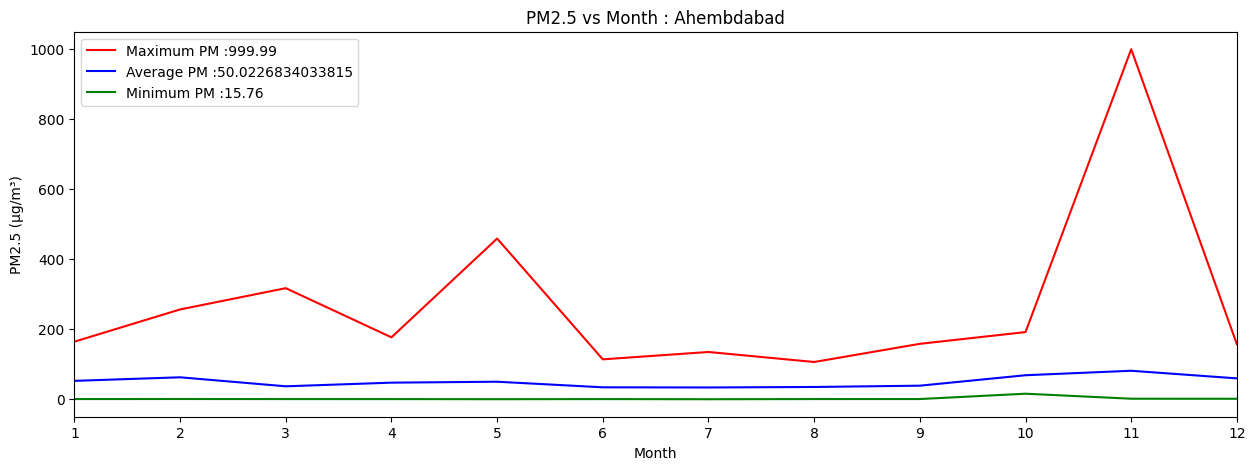

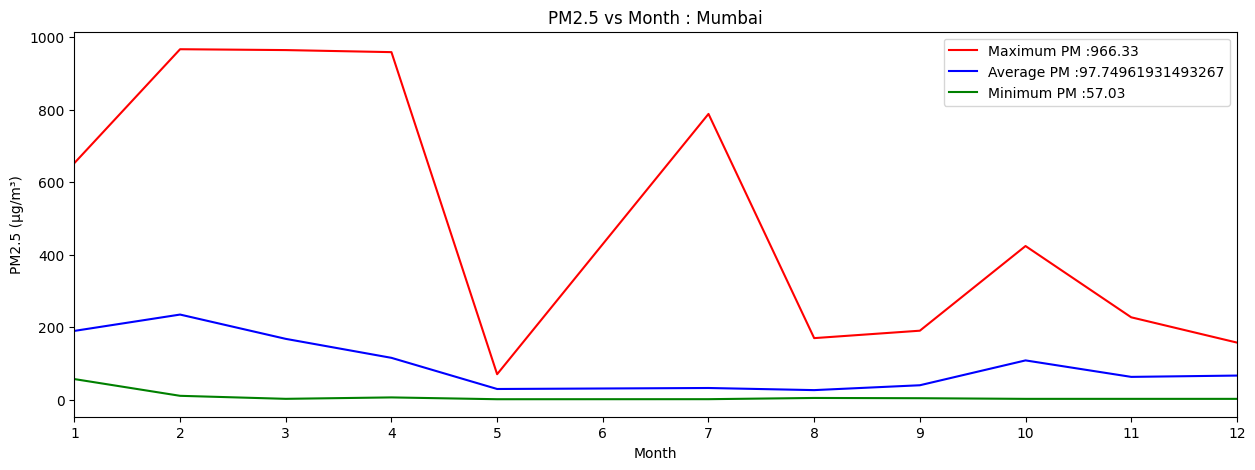

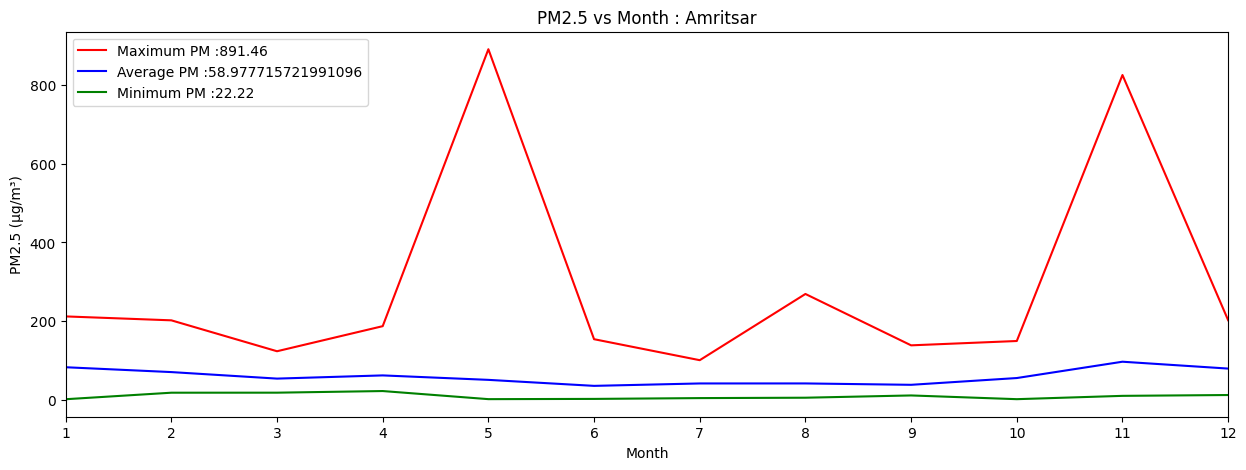

In [25]:
for city in city_dict.keys():
    city_df = df[df['City'] == city_dict[city]]
    max_pm_by_month = city_df.groupby('Timestamp')['PM2.5 (µg/m³)'].max()
    avg_pm_by_month = city_df.groupby('Timestamp')['PM2.5 (µg/m³)'].mean()
    min_pm_by_month = city_df.groupby('Timestamp')['PM2.5 (µg/m³)'].min()
    plt.figure(figsize=(15,5))
    plt.xlabel('Month')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.title(f'PM2.5 vs Month : {city}')
    plt.xticks(range(1,13))
    plt.xlim(1, max(df['Timestamp']))
    plt.plot(max_pm_by_month.index, max_pm_by_month.values, color='red',label=f'Maximum PM :{max(max_pm_by_month)}')
    plt.plot(avg_pm_by_month.index, avg_pm_by_month.values, color='blue',label=f'Average PM :{np.mean(avg_pm_by_month)}')
    plt.plot(min_pm_by_month.index, min_pm_by_month.values, color='green',label=f'Minimum PM :{max(min_pm_by_month)}')
    plt.legend()
    plt.show()

Heatmap Of Features Correlation 

<Axes: >

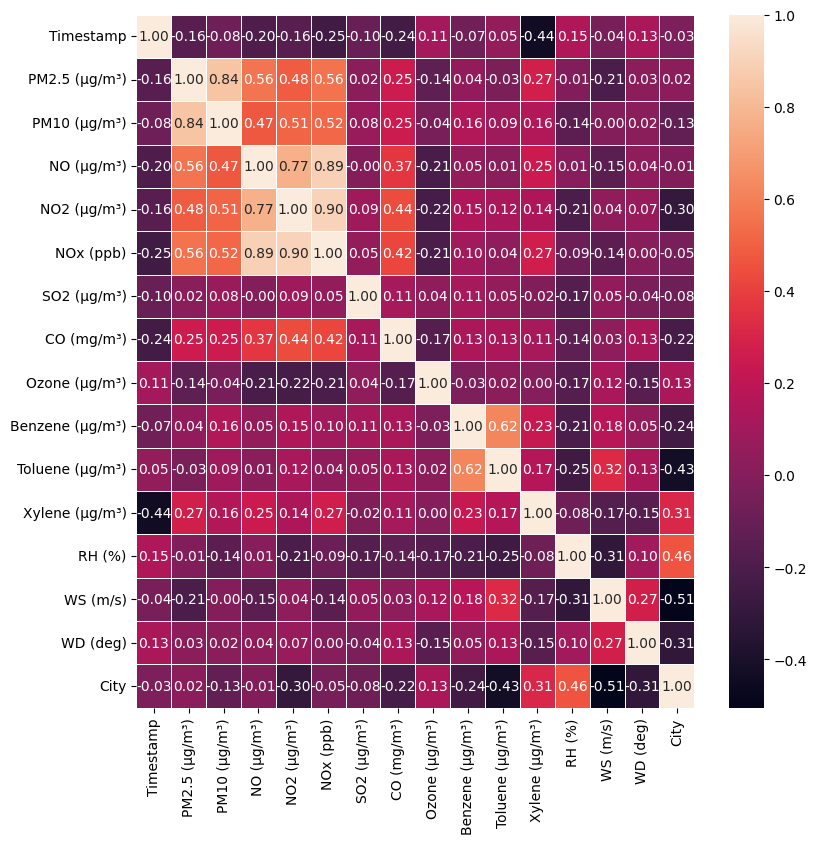

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.5 )

PM 10, NO and Xylene Shows Good Positive Linear Correlation 

City Wise Feature Analysis Based on Domain Knowledge

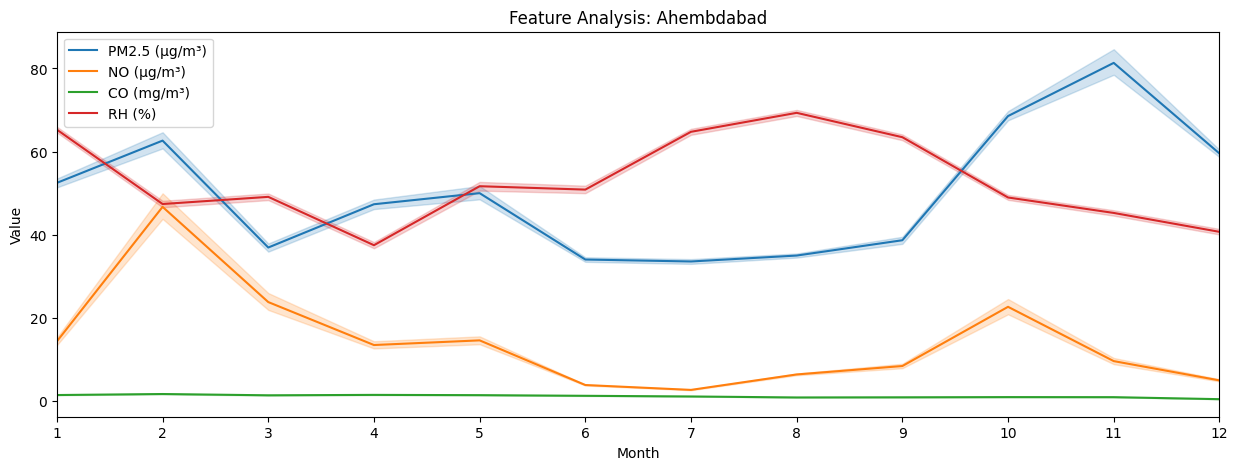

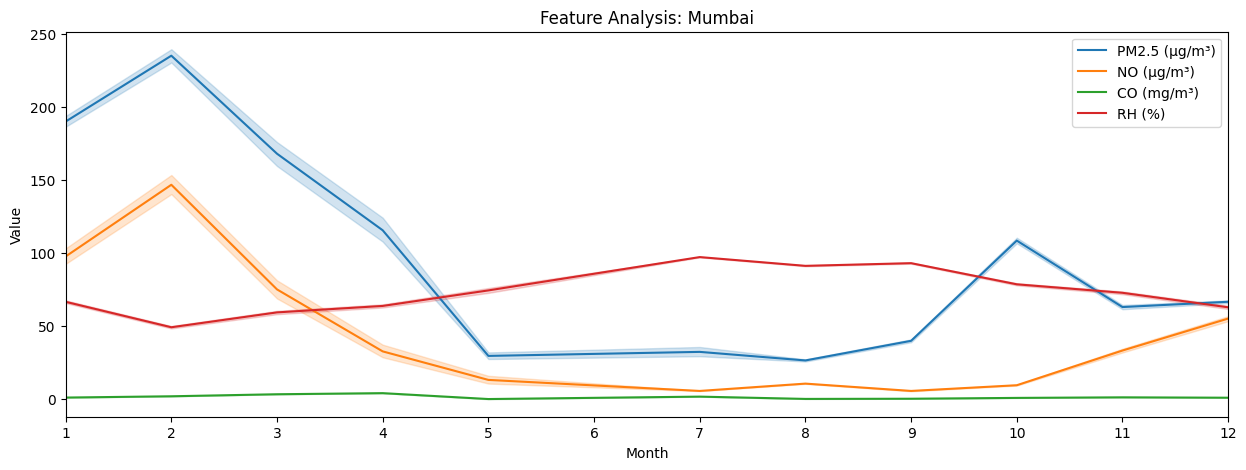

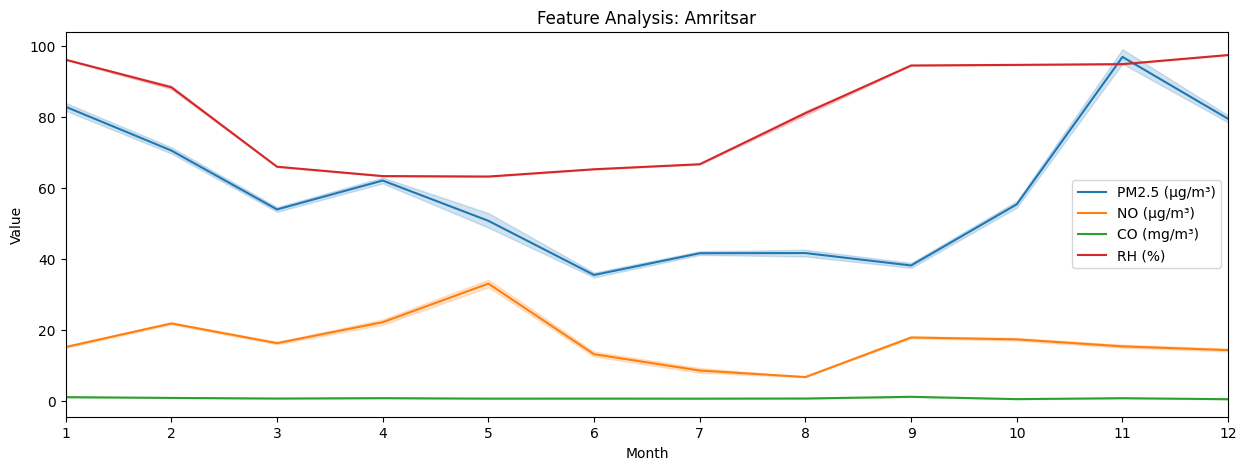

In [27]:
for city in city_dict.keys():
    city_df = df[df['City'] == city_dict[city]]
    plt.figure(figsize = (15,5))
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.title(f'Feature Analysis: {city}')
    plt.xticks(range(1,13))
    plt.xlim(1, max(df['Timestamp']))
    sns.lineplot(data = city_df, x ='Timestamp' , y= 'PM2.5 (µg/m³)', label = 'PM2.5 (µg/m³)')
    sns.lineplot(data = city_df, x ='Timestamp' , y= 'NO (µg/m³)', label = 'NO (µg/m³)')
    sns.lineplot(data = city_df, x ='Timestamp' , y= 'CO (mg/m³)', label = 'CO (mg/m³)')
    sns.lineplot(data = city_df, x ='Timestamp' , y= 'RH (%)', label = 'RH (%)')
    plt.show()

RH Shows Positive Correlation but in Mumbai Because of Sea it shows a Negative Corr. Hence Not a Good Feature

Whereas Month Wise PM2.5 Analysis Shows Similar Trend in All City 

Overall Data Feature Analysis Based on Domain Knowledge

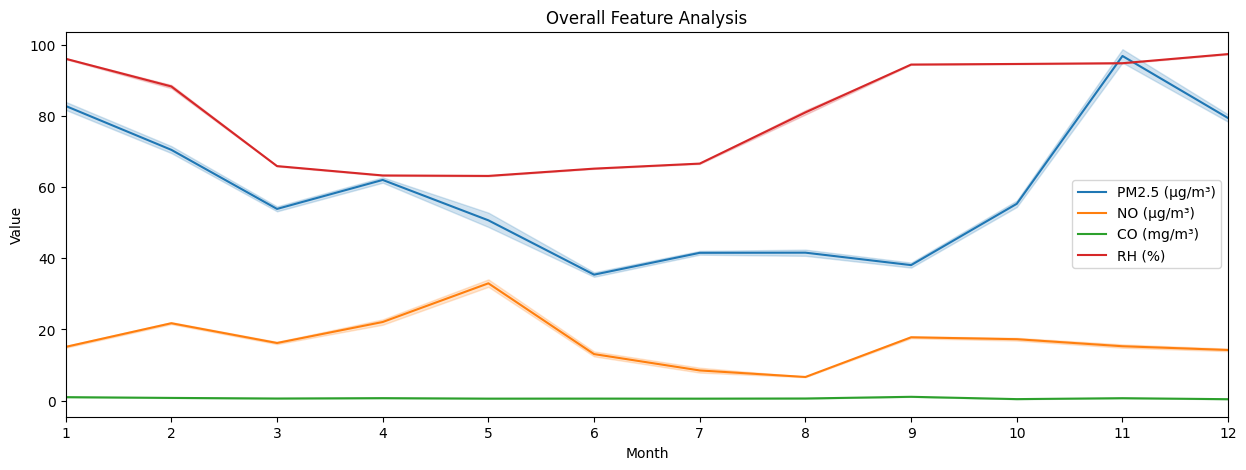

In [28]:
plt.figure(figsize = (15,5))
plt.xlabel('Month')
plt.ylabel('Value')
plt.title(f'Overall Feature Analysis')
plt.xticks(range(1,13))
plt.xlim(1, max(df['Timestamp']))
sns.lineplot(data = city_df, x ='Timestamp' , y= 'PM2.5 (µg/m³)', label = 'PM2.5 (µg/m³)')
sns.lineplot(data = city_df, x ='Timestamp' , y= 'NO (µg/m³)', label = 'NO (µg/m³)')
sns.lineplot(data = city_df, x ='Timestamp' , y= 'CO (mg/m³)', label = 'CO (mg/m³)')
sns.lineplot(data = city_df, x ='Timestamp' , y= 'RH (%)', label = 'RH (%)')
plt.show()

NO is a Considerable Feature as Compared with CO

Using Random Forest Regression To Identify (Non-Linear) Features Importance With PM2.5

In [29]:
X = df.drop([ 'PM2.5 (µg/m³)'], axis=1) 
y = df['PM2.5 (µg/m³)']  

rf_model = RandomForestRegressor(n_estimators=50, random_state=42 , n_jobs = -1)
rf_model.fit(X, y)
feature_importances = rf_model.feature_importances_

In [30]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

            Feature  Importance
1      PM10 (µg/m³)    0.707272
10   Xylene (µg/m³)    0.106810
14             City    0.043648
9   Toluene (µg/m³)    0.021007
0         Timestamp    0.020143
12         WS (m/s)    0.015405
7     Ozone (µg/m³)    0.014591
4         NOx (ppb)    0.013329
3       NO2 (µg/m³)    0.012013
11           RH (%)    0.010481
5       SO2 (µg/m³)    0.009586
2        NO (µg/m³)    0.007320
8   Benzene (µg/m³)    0.006926
6        CO (mg/m³)    0.006487
13         WD (deg)    0.004985


In [31]:
old_df= df.copy()

Based on Linear and Non-Linear Selecting 5 Features

In [82]:
df = old_df.copy()
df = df[['Timestamp','PM2.5 (µg/m³)','PM10 (µg/m³)','Xylene (µg/m³)','City','NOx (ppb)' ]]
features = ['PM2.5 (µg/m³)','PM10 (µg/m³)','NOx (ppb)','Xylene (µg/m³)']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84645 entries, 0 to 105118
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       84645 non-null  int32  
 1   PM2.5 (µg/m³)   84645 non-null  float64
 2   PM10 (µg/m³)    81691 non-null  float64
 3   Xylene (µg/m³)  78158 non-null  float64
 4   City            84645 non-null  int64  
 5   NOx (ppb)       83390 non-null  float64
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.2 MB


Filling the Null Values by Mean Value of That Feature in Same Month and City.

In [83]:
df_ = pd.DataFrame()
filtered_data = []  
for city, city_value in city_dict.items():
  city_df = df.loc[(df['City'] == city_value) & (df['Timestamp'].isin(df['Timestamp'].unique()))]
  for feature in features:
    if city_df[feature].isnull().any():
      avg_value = city_df[feature].mean(skipna=True)
      city_df = city_df.fillna({feature: avg_value})
  filtered_data.append(city_df)
df_ = pd.concat(filtered_data, ignore_index=True)
for feature in features:
    df[feature] = df_[feature].values

Outliers Lookup

PM2.5 (µg/m³)


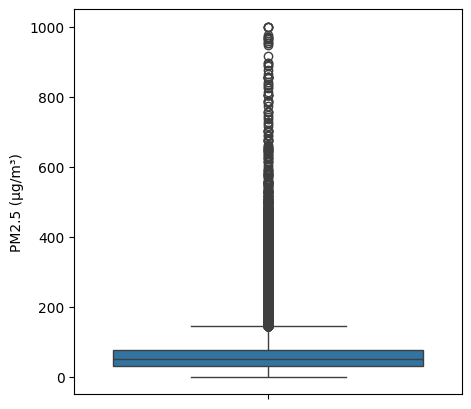

PM10 (µg/m³)


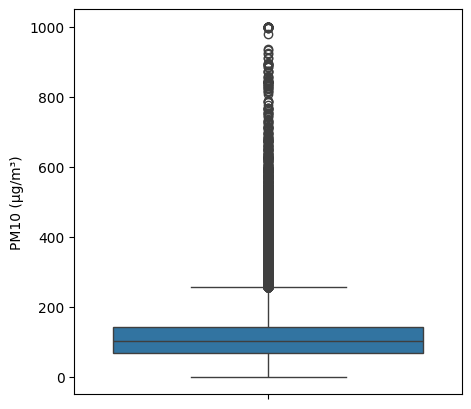

NOx (ppb)


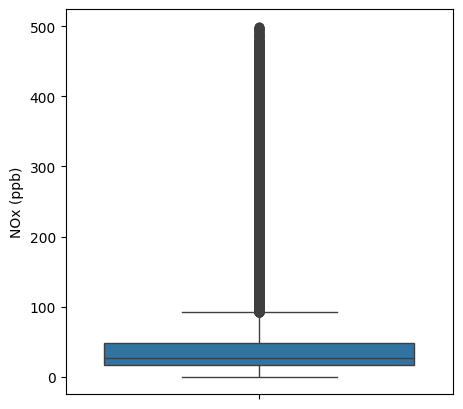

Xylene (µg/m³)


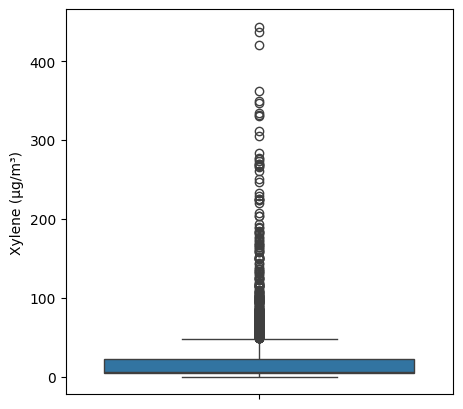

In [70]:
for feature in features:
    print(feature)
    plt.figure(figsize=(5,5))
    sns.boxplot(data = df[feature],showfliers = True)
    plt.show()

Removing Outliers Datapoints

In [72]:
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
    
    df.drop(outliers, inplace=True)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df[['PM10 (µg/m³)','Xylene (µg/m³)','Timestamp','City','NOx (ppb)']]
y = df['PM2.5 (µg/m³)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 23)

model = RandomForestRegressor(n_estimators = 100, random_state = 43 , n_jobs = -1 ) 
model.fit(X_train, y_train)

print("Model Training Accuracy: ",model.score(X_train,y_train))
print("Model Testing Accuracy: ",model.score(X_test,y_test))

Model Training Accuracy:  0.991705275628688
Model Testing Accuracy:  0.9366725072420342


Analysing the Model Result

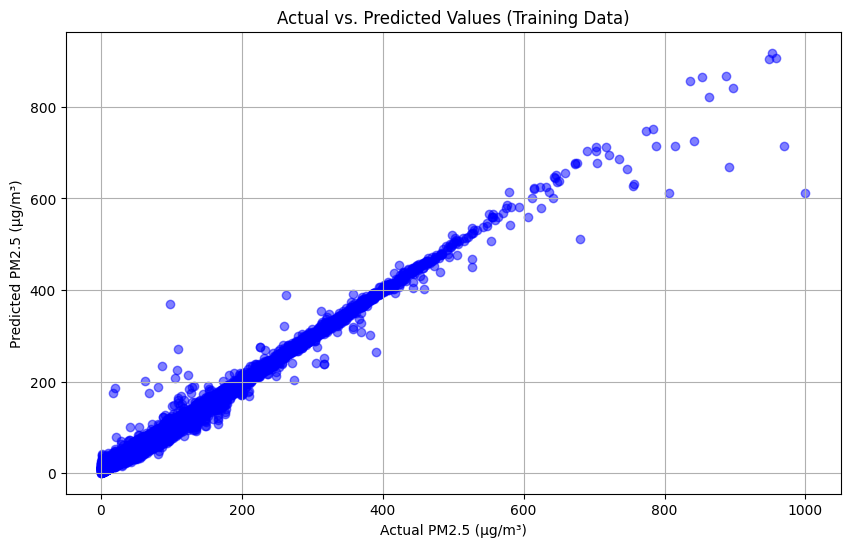

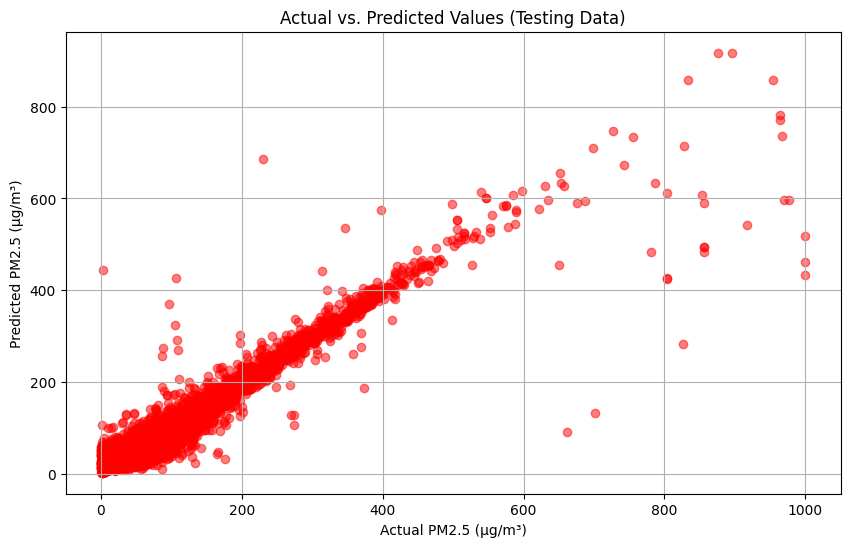

In [85]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Values (Training Data)')
plt.xlabel('Actual PM2.5 (µg/m³)')
plt.ylabel('Predicted PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='red', alpha=0.5)
plt.title('Actual vs. Predicted Values (Testing Data)')
plt.xlabel('Actual PM2.5 (µg/m³)')
plt.ylabel('Predicted PM2.5 (µg/m³)')
plt.grid(True)
plt.show()


Model Show Good Convergence Towards Center In both Training and Testing Cases